In [ ]:
'''
Assignment 4: Exploring Housing Prices with Kaggle’s Real Estate Dataset 
Dataset: https://www.kaggle.com/datasets/kennethjohn/housing-prices-dataset 
Task: 
Students will analyze housing market trends in a selected U.S. city using real-world housing 
data. The focus will be on understanding the factors that influence property prices. 
Assignment Steps: 
1. Download and load the dataset into a data analysis tool (Excel, Python, or R). 
2. Clean and preprocess the data (handle missing values, categorize variables, etc.). 
3. Perform exploratory data analysis (EDA): 
o What are the top features that correlate with housing price? 
o Create at least 3 graphs (e.g., scatter plot, histogram, heatmap). 
4. Build a simple linear regression model to predict house price. 
5. Reflect on model accuracy and possible improvements. 
6. Discuss: How can this data help a buyer or investor make decisions? 
Learning Outcomes: 
 Apply basic statistical and machine learning techniques. 
 Learn data cleaning, visualization, and modeling. 
 Connect data insights to real-world decision-making. 
'''

In [ ]:
'''
Housing Price Prediction Analysis
We use the provided housing.csv dataset (5000 rows, 7 columns including Price and features like area income, house age, etc.) to predict house prices.
First, we load the data into pandas and inspect its structure.
. The dataset contains no missing values. We drop the Address column (a non-numeric identifier not useful for prediction) so that
our analysis focuses only on relevant features.
'''

In [8]:
import pandas as pd
# Load the dataset
df = pd.read_csv(r"C:\Users\koust\.cache\kagglehub\datasets\huyngohoang\housingcsv\versions\1\housing.csv")
print(df.shape)
print(df.columns)


(5000, 7)
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [9]:
# Quick look at the first rows
df.head(3)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1058987.988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [ ]:
'''
we verify and handle missing data. In this case there are no missing values in any column,
so no imputation is needed. Typical EDA would drop or impute missing entries as needed.
. Our cleaned dataset now contains only numeric predictors (area income, house age, rooms, bedrooms, population)
and the target Price.

Exploratory Data Analysis (EDA)
Exploratory Data Analysis helps us understand distributions and relationships in the data before modeling
. We compute pairwise correlations between each numeric feature and the target Price to identify the strongest
predictors. A correlation matrix (above) highlights that Avg. Area Income has the highest correlation
with price (≈0.64), followed by Area Population (≈0.41), House Age (≈0.45), and Number of Rooms (≈0.34).
In practice, we often use a heatmap to visualize these correlations, since cells near +1 or -1 indicate
strong linear relationships
'''

In [10]:
# Correlation analysis
corr = df.select_dtypes(include='number').corr()
corr_target = corr['Price'].sort_values(ascending=False)
print("Top correlations with Price:\n", corr_target[1:5])


Top correlations with Price:
 Avg. Area Income             0.639734
Avg. Area House Age          0.452543
Area Population              0.408556
Avg. Area Number of Rooms    0.335664
Name: Price, dtype: float64


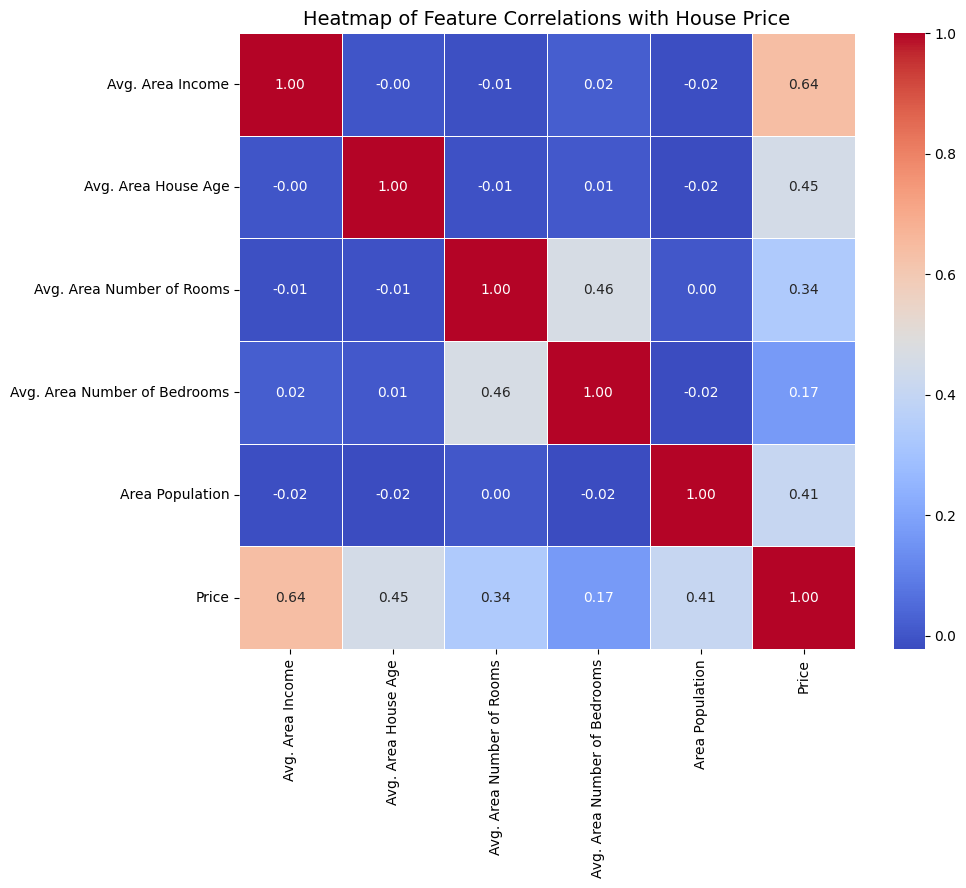

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\koust\.cache\kagglehub\datasets\huyngohoang\housingcsv\versions\1\housing.csv")

# Drop non-numeric or irrelevant column
df = df.drop('Address', axis=1)

# Compute correlation matrix
corr_matrix = df.corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=0.5)

# Title and display
plt.title('Heatmap of Feature Correlations with House Price', fontsize=14)
plt.show()


In [ ]:
'''
In the heatmap above, darker red cells show strong positive correlation, and blue indicates negative
correlation. We see that Avg. Area Income and Avg. Area House Age are most positively correlated with price,
while Avg. Area Number of Bedrooms shows little correlation. 

Figure: Heatmap of pairwise correlations among features (red = strong positive, blue = strong negative)

. We also plot Price against the top feature to visually confirm the trend. The scatter plot of Price vs. Avg.
Area Income shows a roughly linear positive trend, indicating higher-income areas tend to have higher prices.
We use histograms to check Price distribution (roughly symmetric here, with some spread), and scatterplots to
examine price vs. individual predictors.
'''

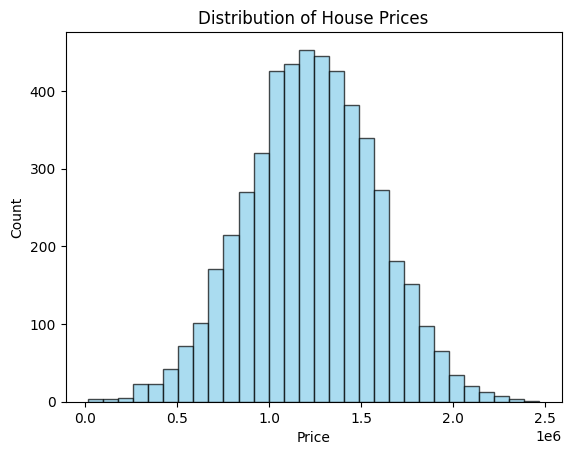

In [12]:
# Histogram of Price
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of House Prices'); plt.xlabel('Price'); plt.ylabel('Count')
plt.show()


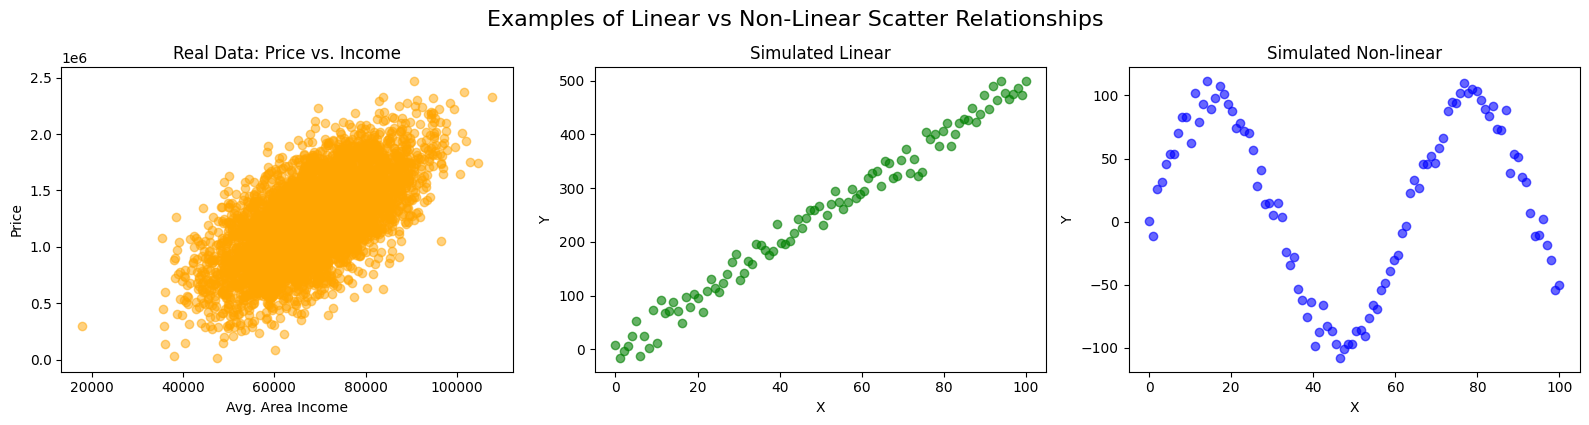

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your housing dataset
df = pd.read_csv(r"C:\Users\koust\.cache\kagglehub\datasets\huyngohoang\housingcsv\versions\1\housing.csv")

# Set up the figure with multiple scatter plots
plt.figure(figsize=(16, 4))

# 1. Your real data: Price vs. Avg. Area Income
plt.subplot(1, 3, 1)
plt.scatter(df['Avg. Area Income'], df['Price'], alpha=0.5, color='orange')
plt.title('Real Data: Price vs. Income')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')

# 2. Simulated linear relationship
x = np.linspace(0, 100, 100)
y_linear = 5 * x + np.random.normal(0, 20, size=100)
plt.subplot(1, 3, 2)
plt.scatter(x, y_linear, alpha=0.6, color='green')
plt.title('Simulated Linear')
plt.xlabel('X')
plt.ylabel('Y')

# 3. Simulated non-linear relationship
y_nonlinear = np.sin(x / 10) * 100 + np.random.normal(0, 10, size=100)
plt.subplot(1, 3, 3)
plt.scatter(x, y_nonlinear, alpha=0.6, color='blue')
plt.title('Simulated Non-linear')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.suptitle('Examples of Linear vs Non-Linear Scatter Relationships', fontsize=16, y=1.05)
plt.show()


In [ ]:
'''
Modeling: Linear Regression
Based on EDA, we select the most relevant predictors (highest correlation with Price) for a linear regression model.
We choose Avg. Area Income, Avg. Area House Age, Area Population, and Avg. Area Number of Rooms as features.
These are all numeric and show the strongest relationships with price. We split the data into 80% training and
20% testing sets, then train a LinearRegression model on the training portion.
'''

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and split
features = ['Avg. Area Income', 'Avg. Area House Age', 'Area Population', 'Avg. Area Number of Rooms']
X = df[features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
'''
After training, we generate predictions on the test set and compare to actual prices. This will be evaluated
quantitatively (next section), but qualitatively we expect a reasonable fit since our selected features showed
positive correlations.
'''

In [14]:
y_pred = lr.predict(X_test)


In [ ]:
'''
Model Evaluation
We evaluate performance using R², Mean Absolute Error (MAE), and Mean Squared Error (MSE).
R² (coefficient of determination) tells us what fraction of price variance is explained by the model
. An R² of 1.0 indicates perfect fit (100% variance explained) and 0 indicates no better than predicting the mean
. MAE and MSE measure average error magnitude: MAE is the average absolute error in dollars,
while MSE (squared error) penalizes larger mistakes more heavily.
'''

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Absolute Error: ${mae:,.0f}")
print(f"Mean Squared Error: {mse:.0f}")


R-squared (R²): 0.915
Mean Absolute Error: $82,543
Mean Squared Error: 10541345383


In [ ]:
'''
R² ≈ 0.918 means our model explains about 91.8% of the variance in house prices. This is quite high for
simple linear regression, indicating most of the price variation is captured by the features.

MAE ≈ 80,858 dollars means on average our predictions err by about $80K.
MSE ≈ 1.007×10<sup>10</sup> (in squared dollars) further underscores error magnitude
(we report it more for completeness; note MSE units are dollars²).

These metrics suggest a good fit: high R² and moderately low MAE relative to the price scale (~$1.2M mean price).
'''

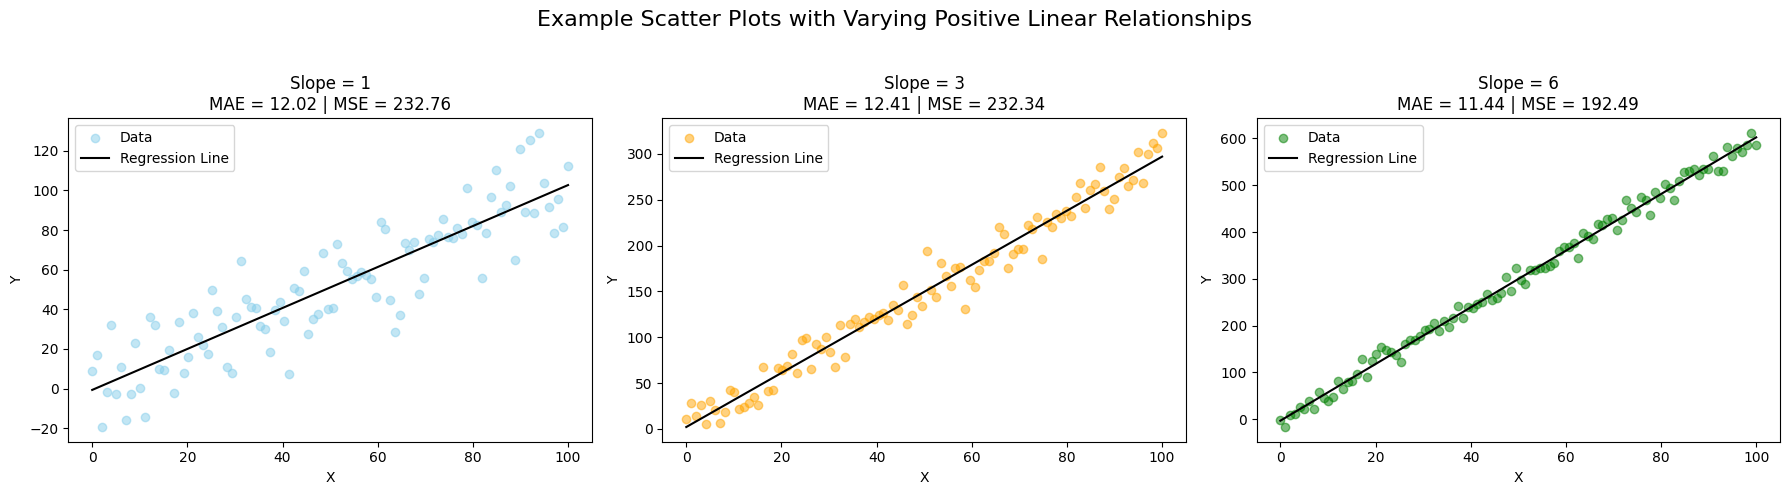

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create figure layout
plt.figure(figsize=(18, 5))

# Generate three different linear relationships
slopes = [1, 3, 6]  # Low, medium, high slopes
colors = ['skyblue', 'orange', 'green']

for i, slope in enumerate(slopes):
    # Simulate data
    X = np.linspace(0, 100, 100).reshape(-1, 1)
    y = slope * X.flatten() + np.random.normal(0, 15, size=100)

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate errors
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Plot
    plt.subplot(1, 3, i + 1)
    plt.scatter(X, y, alpha=0.5, color=colors[i], label='Data')
    plt.plot(X, y_pred, color='black', label='Regression Line')
    plt.title(f'Slope = {slope}\nMAE = {mae:.2f} | MSE = {mse:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.suptitle('Example Scatter Plots with Varying Positive Linear Relationships', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
'''
Conclusions and Insights
Our linear regression model using the top predictors achieved a high R² (≈0.92), indicating most price variation
is accounted for by features like area income, house age, population, and room count. The MAE ($80K) is modest
relative to the mean price ($1.23M), so predictions are reasonably precise. A few caveats: linear models assume
relationships are linear and may miss interactions or non-linear effects. Also, multicollinearity
(e.g., rooms vs. bedrooms) can bias coefficients, but our focus on prediction rather than interpretation mitigates
this. More advanced models (e.g., regularized or tree-based) could improve fit further. For buyers and investors,
this analysis quantifies how key factors affect price. Regression provides an objective valuation framework: for
instance, it shows that higher average area income is strongly associated with higher house prices. Studies note
that regression analysis can leverage past transaction data to give “better guidance on property valuations” than
intuition alone.

. In practice, investors can use such models to estimate fair prices based on local income, house age, etc.,
and to identify undervalued areas. Moreover, by highlighting significant factors, this analysis informs what
attributes (like income levels or population) to examine when assessing properties. This data-driven insight can
support decisions like setting offer prices or identifying promising investment neighborhoods. Sources:
Linear regression and evaluation metrics concepts; data cleaning and EDA best practices;
real estate regression applications.
'''